In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
file = r"C:\Users\Admin\Machine Learning Fundamentals\CSV_files\MLData.xlsx"
df = pd.read_excel(file)

#drop the column 'DA_Concentration' because it is null
df = df.drop(columns=['DA concentration', 'Peak Potential (mV)'])
# Separate features (X) and target variable (y)
X = df.drop('DA Concentration (uM)', axis=1) 
y = df['DA Concentration (uM)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
# Initialize and train the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma='auto')
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr_model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 16030.1889
R^2 Score: 0.7491


In [3]:
#show predictions vs actual values
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df2)

    Actual   Predicted
27       0  120.556861
40     600  476.584331
26       0  174.591482
43      50   43.881870
24       0  174.833542
37     200  233.058916
12     700  496.305237
19       0   14.730766
4       50   28.053254
25       0  161.762224


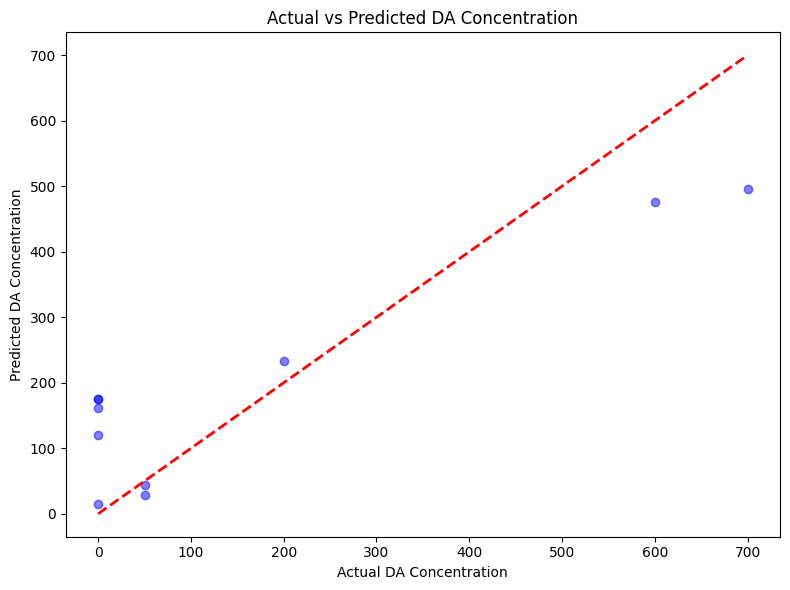

In [4]:
# Plot actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual DA Concentration')
plt.ylabel('Predicted DA Concentration')
plt.title('Actual vs Predicted DA Concentration')
plt.tight_layout()
plt.show()